In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import datetime as dt 
from datetime import datetime, timedelta
import warnings
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings('ignore')
sns.set()

In [2]:
Procedure_66982_data = pd.read_csv("Procedure_66982.csv", encoding='latin-1')
Procedure_66982_data.head()

,ï»¿Rndrng_NPI,Rndrng_Prvdr_Last_Org_Name,Rndrng_Prvdr_First_Name,Rndrng_Prvdr_MI,Rndrng_Prvdr_Crdntls,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Ent_Cd,Rndrng_Prvdr_St1,Rndrng_Prvdr_St2,Rndrng_Prvdr_City,...,HCPCS_Desc,HCPCS_Drug_Ind,Place_Of_Srvc,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
0,1003013533,Cioffi,George,A,MD,M,I,635 W 165th St,NaN,New York,...,"Removal of cataract with insertion of lens, co...",N,F,19,22,22,"$6,550.00",$883.37,$708.94,$588.71
1,1003017468,Smith,Ryan,T,MD,M,I,1330 Interstate Pkwy,NaN,Augusta,...,"Removal of cataract with insertion of lens, co...",N,F,20,22,22,"$2,875.00",$679.40,$537.69,$554.72
2,1003019092,Hawthorne,Kristen,M,M.D.,F,I,2610 S Ih 35,NaN,Austin,...,"Removal of cataract with insertion of lens, co...",N,F,14,17,17,"$1,300.00",$690.30,$556.07,$606.02
3,1003034034,Gordon,Susan,M,M.D.,F,I,1140 White Horse Rd,Suite1,Voorhees,...,"Removal of cataract with insertion of lens, co...",N,F,42,58,58,"$3,000.00",$814.88,$650.95,$587.78
4,1003034927,Bhatia,Sandeep,K,M.D.,M,I,20303 Crawford Ave Ste Ll1,NaN,Olympia Fields,...,"Removal of cataract with insertion of lens, co...",N,F,14,18,18,"$3,365.11",$727.37,$581.89,$539.65


In [3]:
Procedure_66982_data.describe
Procedure_66982_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4982 entries, 0 to 4981
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ï»¿Rndrng_NPI                  4982 non-null   int64  
 1   Rndrng_Prvdr_Last_Org_Name     4982 non-null   object 
 2   Rndrng_Prvdr_First_Name        3683 non-null   object 
 3   Rndrng_Prvdr_MI                2965 non-null   object 
 4   Rndrng_Prvdr_Crdntls           3604 non-null   object 
 5   Rndrng_Prvdr_Gndr              3683 non-null   object 
 6   Rndrng_Prvdr_Ent_Cd            4982 non-null   object 
 7   Rndrng_Prvdr_St1               4982 non-null   object 
 8   Rndrng_Prvdr_St2               1544 non-null   object 
 9   Rndrng_Prvdr_City              4982 non-null   object 
 10  Rndrng_Prvdr_State_Abrvtn      4982 non-null   object 
 11  Rndrng_Prvdr_State_FIPS        4982 non-null   int64  
 12  Rndrng_Prvdr_Zip5              4982 non-null   i

In [4]:
Procedure_66982_data.isnull

<bound method DataFrame.isnull of       ï»¿Rndrng_NPI Rndrng_Prvdr_Last_Org_Name Rndrng_Prvdr_First_Name  \
0        1003013533                     Cioffi                  George   
1        1003017468                      Smith                    Ryan   
2        1003019092                  Hawthorne                 Kristen   
3        1003034034                     Gordon                   Susan   
4        1003034927                     Bhatia                 Sandeep   
...             ...                        ...                     ...   
4977     1992932776                      Routh                  Robert   
4978     1992954259                Leoncavallo                 Anthony   
4979     1992964837                     Ailani                  Haresh   
4980     1992971519                    Qureshi                  Joseph   
4981     1992976146                      Huang                   Harry   

     Rndrng_Prvdr_MI Rndrng_Prvdr_Crdntls Rndrng_Prvdr_Gndr  \
0             

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

fraud_data = Procedure_66982_data.drop(['ï»¿Rndrng_NPI', 'Rndrng_Prvdr_Last_Org_Name', 'Rndrng_Prvdr_First_Name',
                                 'Rndrng_Prvdr_MI', 'Rndrng_Prvdr_Crdntls', 'Rndrng_Prvdr_Gndr',
                                 'Rndrng_Prvdr_Ent_Cd', 'Rndrng_Prvdr_St1', 'Rndrng_Prvdr_St2',
                                 'Rndrng_Prvdr_City', 'Rndrng_Prvdr_State_Abrvtn', 'Rndrng_Prvdr_State_FIPS',
                                 'Rndrng_Prvdr_Zip5', 'Rndrng_Prvdr_RUCA_Desc', 'Rndrng_Prvdr_Cntry',
                                 'Rndrng_Prvdr_Type', 'HCPCS_Cd', 'HCPCS_Desc', 'HCPCS_Drug_Ind',
                                 'Place_Of_Srvc'], axis=1)

fraud_data_cleaned = fraud_data.dropna()

numerical_cols = fraud_data_cleaned.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = fraud_data_cleaned.select_dtypes(include=['object']).columns

numerical_cols, categorical_cols

fraud_data_cleaned['Tot_Srvcs'] = pd.to_numeric(fraud_data_cleaned['Tot_Srvcs'], errors='coerce')
fraud_data_cleaned['Avg_Sbmtd_Chrg'] = fraud_data_cleaned['Avg_Sbmtd_Chrg'].replace('[\$,]', '', regex=True).astype(float)
fraud_data_cleaned['Avg_Mdcr_Alowd_Amt'] = fraud_data_cleaned['Avg_Mdcr_Alowd_Amt'].replace('[\$,]', '', regex=True).astype(float)
fraud_data_cleaned['Avg_Mdcr_Pymt_Amt'] = fraud_data_cleaned['Avg_Mdcr_Pymt_Amt'].replace('[\$,]', '', regex=True).astype(float)
fraud_data_cleaned['Avg_Mdcr_Stdzd_Amt'] = fraud_data_cleaned['Avg_Mdcr_Stdzd_Amt'].replace('[\$,]', '', regex=True).astype(float)

fraud_data_cleaned.dtypes

Rndrng_Prvdr_RUCA                float64
Rndrng_Prvdr_Mdcr_Prtcptg_Ind     object
Tot_Benes                          int64
Tot_Srvcs                        float64
Tot_Bene_Day_Srvcs                 int64
Avg_Sbmtd_Chrg                   float64
Avg_Mdcr_Alowd_Amt               float64
Avg_Mdcr_Pymt_Amt                float64
Avg_Mdcr_Stdzd_Amt               float64
dtype: object

In [6]:
Procedure_66982_data.to_csv('cleaned_Procedure_66982_data.csv', index=False)

In [7]:
df1=pd.read_csv('cleaned_Procedure_66982_data.csv')
Procedure_eighty_data_train, Procedure_twenty_data_test = train_test_split(df1, 
                                                         random_state=104, 
                                                         test_size=0.20, 
                                                         shuffle=True)
Procedure_eighty_data_train.to_csv('Procedure(66982)_80_data.csv',index=False)
Procedure_twenty_data_test.to_csv('Procedure(66982)_20_data.csv',index=False)

In [8]:
csv_file_path = 'Procedure(66982)_80_data.csv'
columns_to_convert = ['Avg_Sbmtd_Chrg', 'Avg_Mdcr_Alowd_Amt', 'Avg_Mdcr_Stdzd_Amt']

data = pd.read_csv(csv_file_path)

# Convert currency formatted columns to floats
for column in columns_to_convert:
    data[column] = data[column].replace('[\$,]', '', regex=True).astype(float)

# Select and rename the columns you need
data_for_var = data[['Tot_Benes', 'Tot_Srvcs', 'Avg_Mdcr_Stdzd_Amt']].rename(columns={
    'Tot_Benes': 'Tot_Benes',
    'Tot_Srvcs': 'Tot_Srvcs',
    'Avg_Mdcr_Stdzd_Amt': 'Avg_Mdcr_Stdzd_Amt'
})

# Ensure all data is in numeric form and drop any rows with NaN values
data_for_var = data_for_var.apply(pd.to_numeric, errors='coerce').dropna()

print(data_for_var.head())
print(data_for_var.dtypes)

   Tot_Benes  Tot_Srvcs  Avg_Mdcr_Stdzd_Amt
0         28       32.0              581.89
1         29       38.0              771.93
2         11       12.0              562.18
3         13       22.0              117.75
4         12       16.0              588.58
Tot_Benes               int64
Tot_Srvcs             float64
Avg_Mdcr_Stdzd_Amt    float64
dtype: object


In [9]:
data_for_var['Tot_Benes_standard_normal_variate'] = (data_for_var['Tot_Benes'] - data_for_var['Tot_Benes'].mean()) / data_for_var['Tot_Benes'].std()
data_for_var['Tot_Srvcs_standard_normal_variate'] = (data_for_var['Tot_Srvcs'] - data_for_var['Tot_Srvcs'].mean()) / data_for_var['Tot_Srvcs'].std()
data_for_var['Avg_Mdcr_Stdzd_Amt_standard_normal_variate'] = (data_for_var['Avg_Mdcr_Stdzd_Amt'] - data_for_var['Avg_Mdcr_Stdzd_Amt'].mean()) / data_for_var['Avg_Mdcr_Stdzd_Amt'].std()

data_for_var.head()


,Tot_Benes,Tot_Srvcs,Avg_Mdcr_Stdzd_Amt,Tot_Benes_standard_normal_variate,Tot_Srvcs_standard_normal_variate,Avg_Mdcr_Stdzd_Amt_standard_normal_variate
0,28,32.0,581.89,-0.112141,-0.211364,-0.124550
1,29,38.0,771.93,-0.083824,-0.108504,1.229521
2,11,12.0,562.18,-0.593523,-0.554231,-0.264987
3,13,22.0,117.75,-0.536889,-0.382798,-3.431636
4,12,16.0,588.58,-0.565206,-0.485658,-0.076882


In [10]:
data_for_var.to_csv('original_data.csv', index=False)

Centroids:
[[ 0.41551129  0.2702766   1.23919358]
 [-0.27490216 -0.22982485 -0.44591959]
 [ 4.69187291  4.93273823  0.20524229]]
Cluster 0 has 1020 points.
Cluster 1 has 2878 points.
Cluster 2 has 78 points.


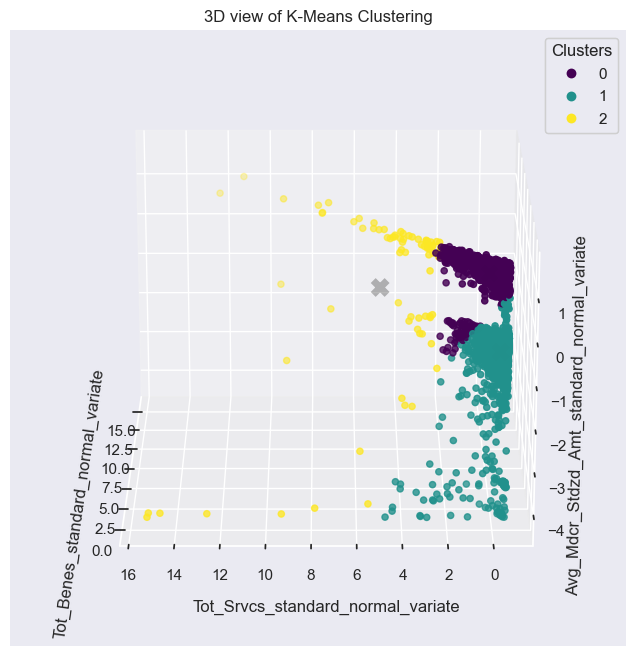

In [11]:
X = data_for_var[['Tot_Benes_standard_normal_variate', 'Tot_Srvcs_standard_normal_variate', 'Avg_Mdcr_Stdzd_Amt_standard_normal_variate']].values

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

data_for_var['Cluster_Label'] = kmeans.labels_
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print("Centroids:")
print(centroids)

for i in range(3):
    print(f"Cluster {i} has {sum(labels == i)} points.")

# Setting up the 3D plot with a specified figure size
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.view_init(elev=20, azim=180)

# Using a color map for clusters
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', marker='o')

# Adding centroids to the plot
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', color='k', s=100, linewidths=5, zorder=10)

# Adding a color bar as a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Adjusting the labels to be more visible by moving them closer to the ticks
ax.set_xlabel('Tot_Benes_standard_normal_variate', labelpad=10)
ax.set_ylabel('Tot_Srvcs_standard_normal_variate', labelpad=10)
ax.set_zlabel('Avg_Mdcr_Stdzd_Amt_standard_normal_variate', labelpad=0)

plt.title('3D view of K-Means Clustering')
plt.show()

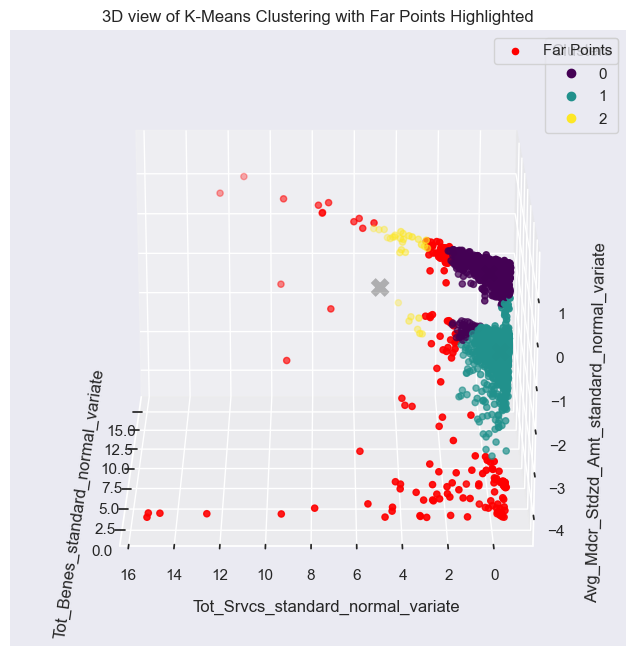

In [12]:
X = data_for_var[['Tot_Benes_standard_normal_variate', 'Tot_Srvcs_standard_normal_variate', 'Avg_Mdcr_Stdzd_Amt_standard_normal_variate']].values

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

data_for_var['Cluster_Label'] = kmeans.labels_
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Calculate the distance of each point to its centroid
distances = np.sqrt(((X - centroids[labels]) ** 2).sum(axis=1))

# Determine a threshold to identify points far from centroids
# For example, set the threshold as the 95th percentile of the distances
threshold = np.percentile(distances, 95)

# Identify points that are far from their centroids
far_points = distances > threshold

# Setting up the 3D plot with a specified figure size
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.view_init(elev=20, azim=180)

# Plotting regular points
ax.scatter(X[~far_points, 0], X[~far_points, 1], X[~far_points, 2], c=labels[~far_points], cmap='viridis', marker='o')

# Highlighting points that are far from centroids
ax.scatter(X[far_points, 0], X[far_points, 1], X[far_points, 2], c='red', marker='o', label='Far Points')

# Adding centroids to the plot
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', color='k', s=100, linewidths=5, zorder=10)

# Adding a legendA
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.legend()

ax.set_xlabel('Tot_Benes_standard_normal_variate', labelpad=10)
ax.set_ylabel('Tot_Srvcs_standard_normal_variate', labelpad=10)
ax.set_zlabel('Avg_Mdcr_Stdzd_Amt_standard_normal_variate', labelpad=10)

plt.title('3D view of K-Means Clustering with Far Points Highlighted')
plt.show()

In [13]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

# Assuming data_for_var and other variables are already defined as per your previous code

# Add a column to indicate if a point is an outlier
data_for_var['Far_Point'] = far_points

# Initialize the outlier columns with NaN or some placeholder value
data_for_var['Outlier_Tot_Benes'] = np.nan
data_for_var['Outlier_Tot_Srvcs'] = np.nan
data_for_var['Outlier_Avg_Mdcr_Stdzd_Amt'] = np.nan

# Populate the outlier columns
for i, row in data_for_var.iterrows():
    if row['Far_Point']:
        data_for_var.at[i, 'Outlier_Tot_Benes'] = row['Tot_Benes_standard_normal_variate']
        data_for_var.at[i, 'Outlier_Tot_Srvcs'] = row['Tot_Srvcs_standard_normal_variate']
        data_for_var.at[i, 'Outlier_Avg_Mdcr_Stdzd_Amt'] = row['Avg_Mdcr_Stdzd_Amt_standard_normal_variate']

# Now the CSV will have separate columns showing the outliers for each feature
data_for_var.to_csv('Kmeans_data.csv', index=False)

In [14]:
data_for_var['Far_Point'] = far_points
print(data_for_var.head())

   Tot_Benes  Tot_Srvcs  Avg_Mdcr_Stdzd_Amt  \
0         28       32.0              581.89   
1         29       38.0              771.93   
2         11       12.0              562.18   
3         13       22.0              117.75   
4         12       16.0              588.58   

   Tot_Benes_standard_normal_variate  Tot_Srvcs_standard_normal_variate  \
0                          -0.112141                          -0.211364   
1                          -0.083824                          -0.108504   
2                          -0.593523                          -0.554231   
3                          -0.536889                          -0.382798   
4                          -0.565206                          -0.485658   

   Avg_Mdcr_Stdzd_Amt_standard_normal_variate  Cluster_Label  Far_Point  \
0                                   -0.124550              1      False   
1                                    1.229521              0      False   
2                                   -0.26

In [15]:
data_for_var.to_csv('Kmeans_data.csv',index=False)